# Exercises

## 9.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version="1")
X = mnist['data']
y = mnist['target']
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

- Training a Random Forest on original data

In [2]:
import time
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(n_estimators=800, max_depth=27, min_samples_leaf=6, n_jobs=7)
tic = time.time()
r_forest.fit(X_train, y_train)
toc = time.time()
r_forest_time = toc - tic
print("random forest time: ", r_forest_time)

random forest time:  97.64151859283447


In [17]:
from sklearn.metrics import accuracy_score
print("random forest accuracy: ", accuracy_score(y_test, r_forest.predict(X_test)))

random forest accuracy:  0.9646


In [18]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

In [24]:
pca.n_components_

154

In [27]:
r_forest_pca = RandomForestClassifier(n_estimators=800, max_depth=27, min_samples_leaf=6, n_jobs=7)
tic = time.time()
r_forest_pca.fit(X_train_pca, y_train)
toc = time.time()
r_forest_pca_time = toc - tic
print("random forest pca time: ", r_forest_pca_time)

random forest pca time:  268.7177186012268


In [29]:
print("random forest with pca accuracy: ", accuracy_score(y_test, r_forest_pca.predict(pca.transform(X_test))))

random forest with pca accuracy:  0.9472


LoL! more time and less accuracy.

## 9.

In [41]:
from sklearn.manifold.t_sne import TSNE
tsne = TSNE(n_components=2 )
X_tsne = tsne.fit_transform(X[:10000])

/home/nimahsn/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
No handles with labels found to put in legend.


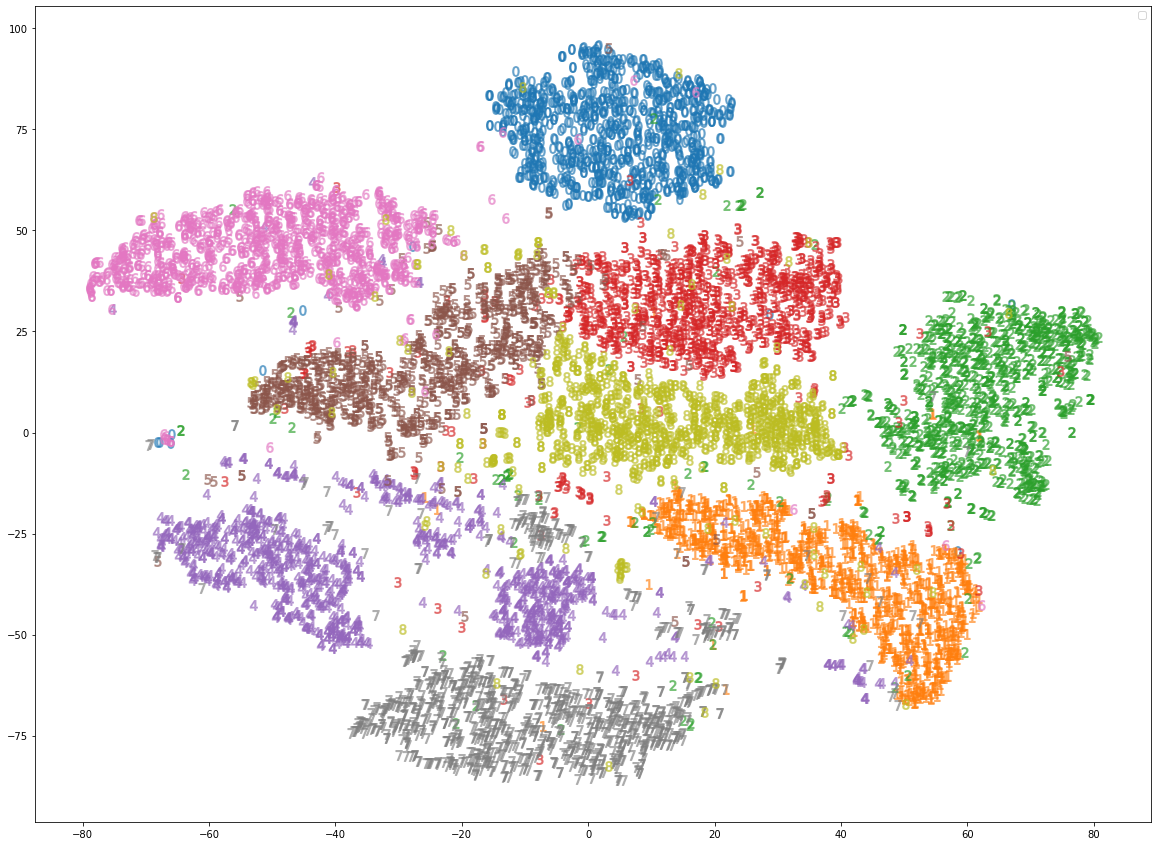

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline
y_tsne = y[:10000]
plt.figure(figsize=(20,15))
for i in range(9):
    plt.scatter(X_tsne[[y_tsne==str(i)]][:, 0], X_tsne[[y_tsne==str(i)]][:, 1], marker='$'+str(i)+'$', alpha=0.5, s=100)
plt.legend()

Noice!
